# Analyse et préparation des données pour le perceptron

In [33]:
import pandas as pd # data exploration
import numpy as np # data exploration
import matplotlib.pyplot as plt # data visualisation
import seaborn as sns #data visualisation
import os # data visualisation (file path)
from matplotlib import style # data visualisation
import matplotlib.gridspec as gridspec # data visualisation
import scipy.stats as stats # data visualisation
from imblearn.under_sampling import RandomUnderSampler # Handling Imbalance
from sklearn.linear_model import LogisticRegression  # For the features selection
from sklearn.feature_selection import SequentialFeatureSelector # For the features selection
from sklearn.model_selection import cross_val_score # For the features selection
from sklearn.metrics import r2_score # For the features selection
from sklearn.model_selection import train_test_split # For the features selection
from sklearn.preprocessing import StandardScaler # For scaling the data



## Chargé les données

In [34]:
df = pd.read_csv('bcw_data.csv')
print(f'Les données font {df.shape[0]} lignes et {df.shape[1]} colonnes')
df.head()

Les données font 569 lignes et 33 colonnes


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [35]:
print(f'La liste des variables: {df.columns}')

La liste des variables: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [36]:
# Enlevé les variables qui ne sont pas utiles
df = df.drop('id', axis = 1)
df = df.drop('Unnamed: 32', axis = 1)

## Exploration des données

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [38]:
df.describe

<bound method NDFrame.describe of     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.2

### Vérification des valeurs manquantes

In [39]:
print(f'Il y a {df.isnull().sum().sum()} valeurs manquantes dans le dataset')

Il y a 0 valeurs manquantes dans le dataset


### Verification des dublons

In [40]:
print(f' Il y a {df.duplicated().sum()} de valeurs en doublon')

 Il y a 0 de valeurs en doublon


Le dataset ne nécessite pas de préparation pour l'exploration

## Analyse des données

Text(0.5, 1.0, 'Correlation Map between all the variables')

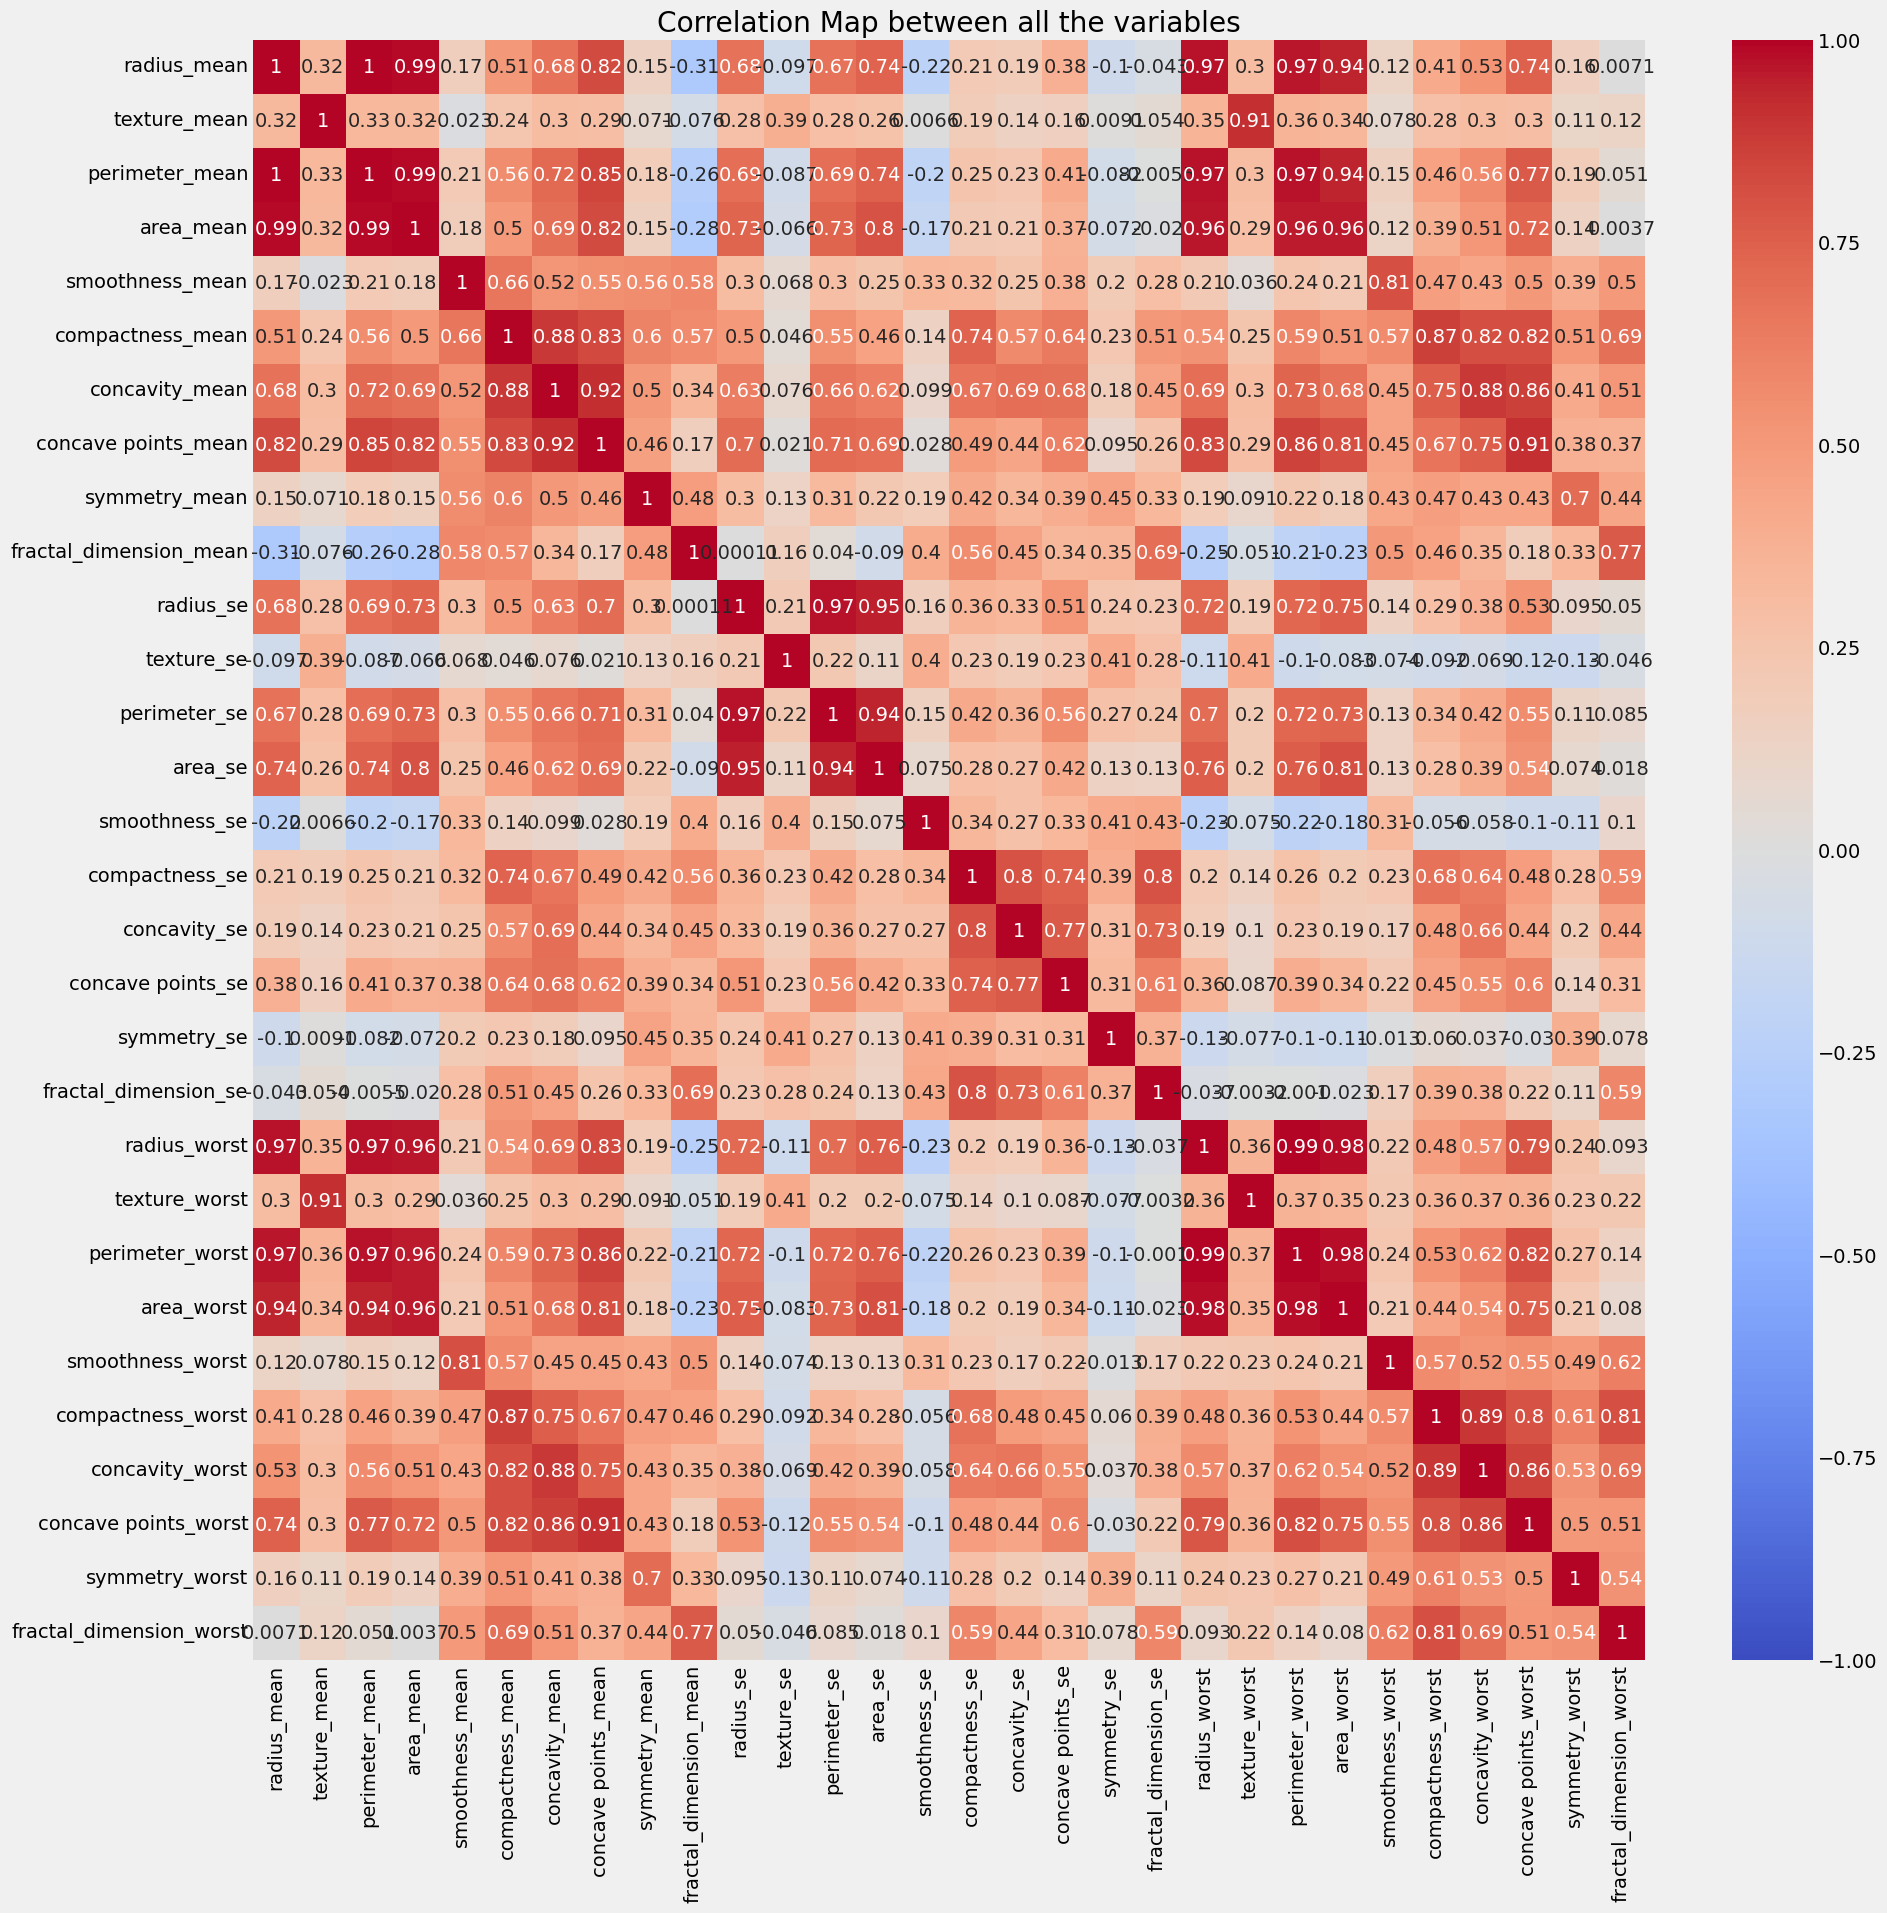

In [41]:
# Taking the resuslt column as the target column 
y = df.pop('diagnosis')

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Add title
plt.title('Correlation Map between all the variables')
# plt.savefig('figures/Correlation Map between all the variables.png')

On peut voir que périmètre, surface et rayon sont corrélés entre eux. On peut alors enlever deux tout en gardant la pertinance de l'analyse. Dans ce cas, on a enlever périmètre et la surface.

On commence avec 30 variables
On est maintenant à 24 colonnes dans le dataset


Text(0.5, 1.0, 'Correlation Map without area and perimeter columns')

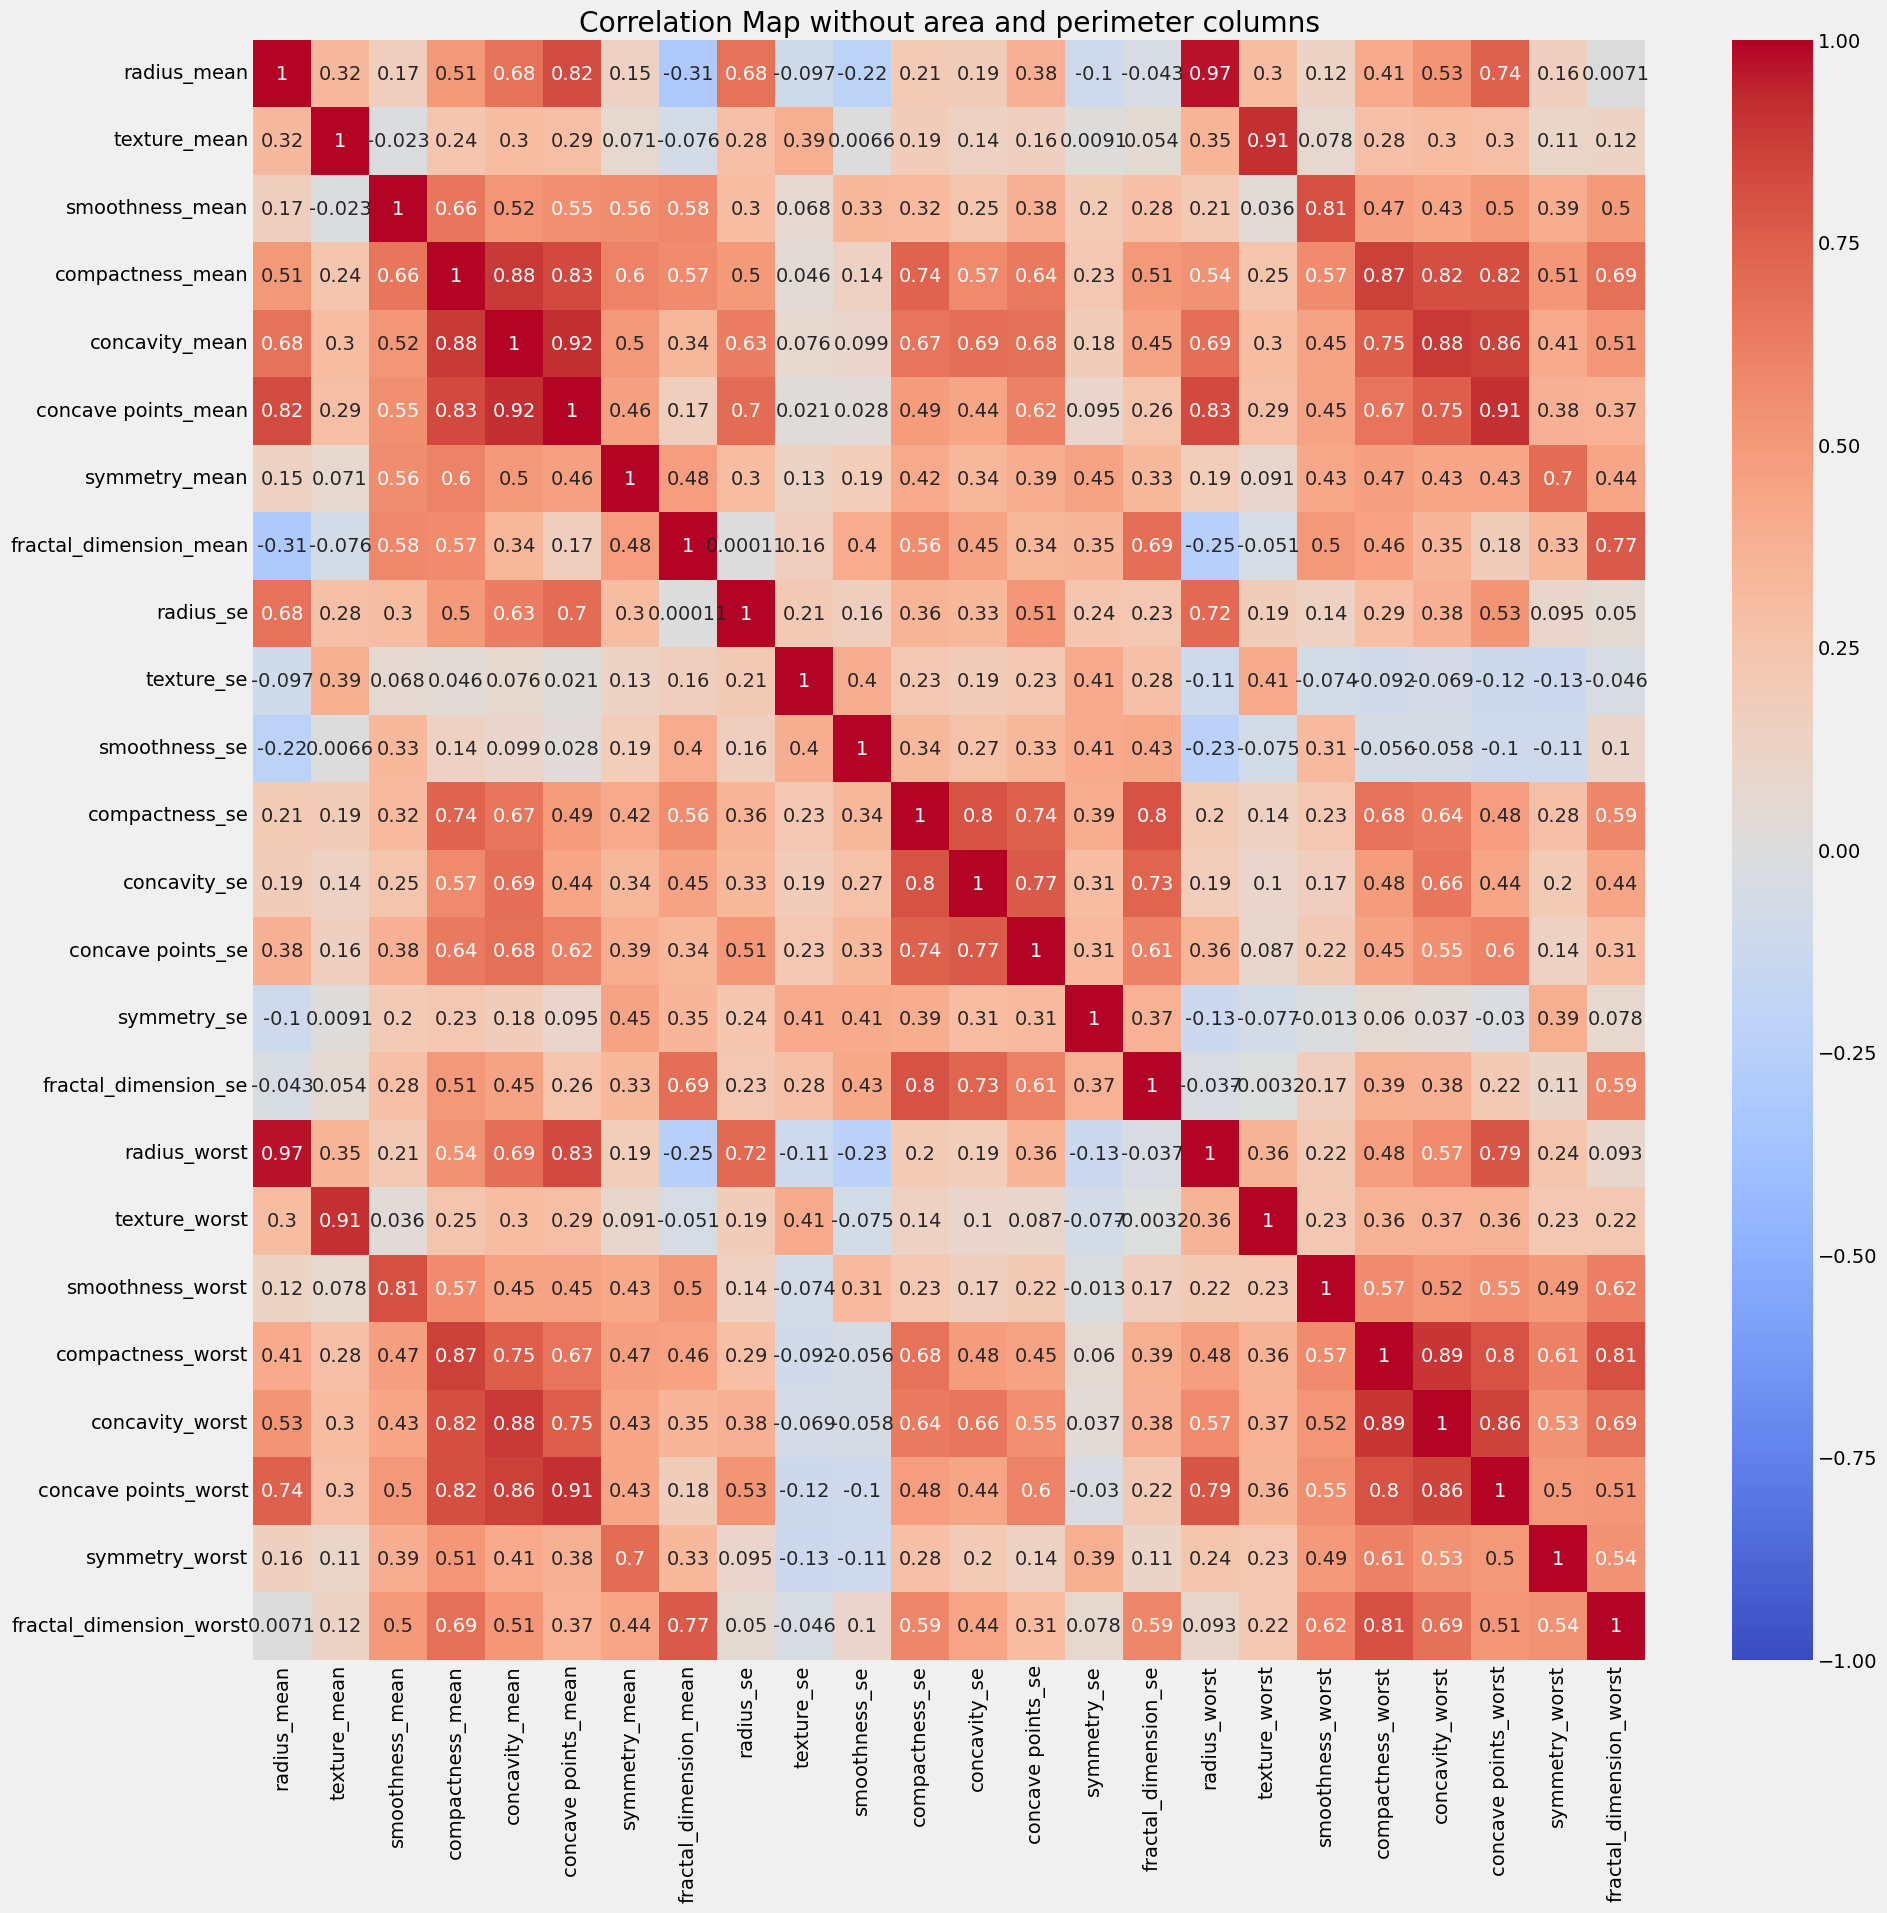

In [42]:
# Removing the perimeters and areas variables
print(f'On commence avec {len(df.columns)} variables')
df = df.drop(columns=['area_mean', 'area_se', 'area_worst', 'perimeter_mean', 'perimeter_se', 'perimeter_worst'])
print(f'On est maintenant à {len(df.columns)} colonnes dans le dataset')

# The correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Add title
plt.title('Correlation Map without area and perimeter columns')
# plt.savefig('figures/Correlation Map without area and perimeter columns.png')

In [43]:
df.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,...,0.03003,0.006193,25.38,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,...,0.01389,0.003532,24.99,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,...,0.02250,0.004571,23.57,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,...,0.05963,0.009208,14.91,26.50,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,...,0.01756,0.005115,22.54,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Visualisation of the target**

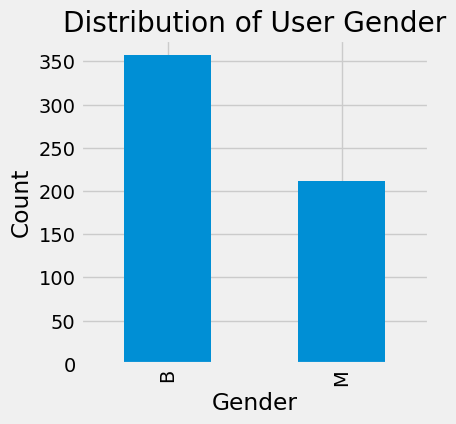

In [44]:
counts = y.value_counts()

# Plot
plt.figure(figsize=(4, 4))
counts.plot(kind='bar')
plt.title('Distribution of User Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.savefig('figures/Target representation.png')

**Commentaire :**
La distribution des classes est déséquilibrée. Il y a plus de cas bénins que de cas malins.
Il faudrait faire une amputation de donnée


### Visualisation of the features

In [45]:
# Ensure the subfolder exists
if not os.path.exists('figures/visualizations'):
    os.makedirs('figures/visualizations')


def plotting_3_chart(df_normalized, feature):
    style.use('fivethirtyeight')
    fig = plt.figure(constrained_layout=True, figsize=(15,10))
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(df_normalized.loc[:, feature], norm_hist=True, ax=ax1)

    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot')
    stats.probplot(df_normalized.loc[:, feature], plot=ax2)

    ax3 = fig.add_subplot(grid[:, 2])
    ax3.set_title('Box Plot')
    sns.boxplot(df_normalized.loc[:, feature], orient='v', ax=ax3)

    # Save the figure
    fig.savefig(f'figures/visualizations/{feature}_visualization.png')
    plt.close(fig)

In [46]:
for i in df.columns[0:len(df.columns)]:
    plotting_3_chart(df,i)

C:\Users\tanjo\AppData\Local\Temp\ipykernel_97268\87419835.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_normalized.loc[:, feature], norm_hist=True, ax=ax1)
C:\Users\tanjo\AppData\Local\Temp\ipykernel_97268\87419835.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_normalized.loc

In [47]:
# Each features histogram
# Plotting each feature's histogram individually
if not os.path.exists('figures/histograms full'):
    os.makedirs('figures/histograms full')

for feature in df.columns:
    plt.figure(figsize=(10, 6))
    df[feature].hist()
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend([f'N = {y.value_counts().to_dict()}'])
    plt.savefig(f'figures/histograms full/{feature}_histogram_full.png')
    plt.close()

**Global visualisation**

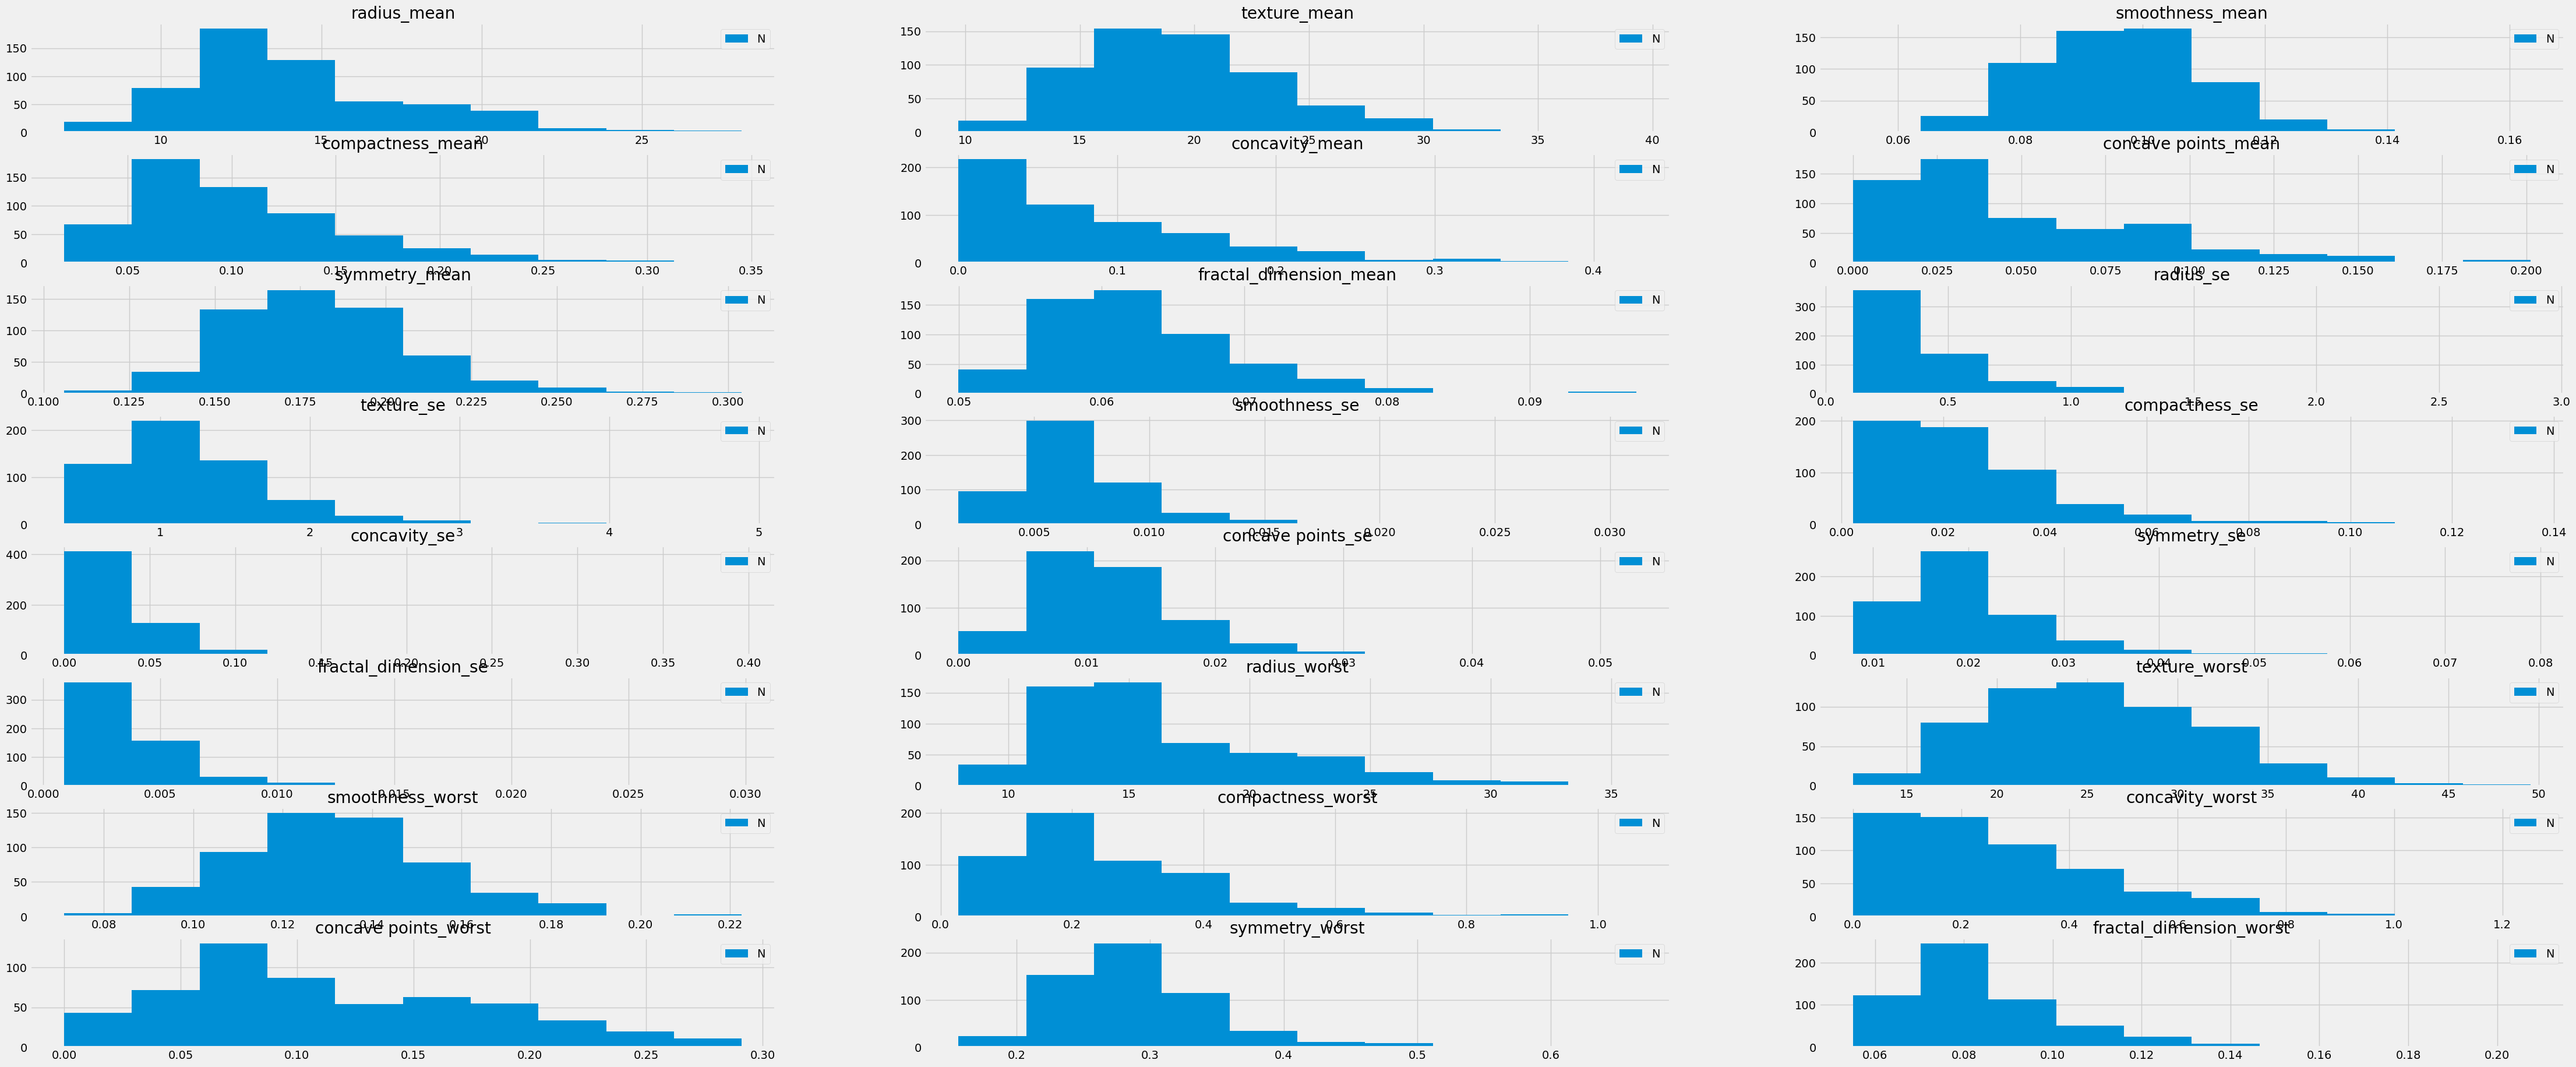

In [48]:
plt.figure(figsize=(50,30))
for i,feature in enumerate(df):
    plt.subplot(11,3,i+1)
    df[feature].hist()
    plt.legend(f'N = {y.value_counts()}')
    plt.title(feature)
    plt.savefig('figures/histograms full/full view.png')

### Adressing class imbalance

In [49]:
y.value_counts().to_frame().T

diagnosis,B,M
count,357,212


In [51]:
# Instantiate the undersampler
undersampler = RandomUnderSampler()

# Apply undersampling to your dataset
df_resampled, y_resampled = undersampler.fit_resample(df, y)

# Transforming diagnos into Boolean
y_resampled = y_resampled.map({'M': 1, 'B': 0})
y_resampled.value_counts().to_frame().T

diagnosis,0,1
count,212,212


In [52]:
df_resampled.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
284,12.890,15.70,0.07818,0.09580,0.11150,0.033900,0.1432,0.05935,0.2913,1.3890,...,0.01878,0.003696,13.900,19.69,0.09926,0.23170,0.3344,0.10170,0.1999,0.07127
145,11.900,14.65,0.11520,0.12960,0.03710,0.030030,0.1995,0.07839,0.3962,0.6538,...,0.03127,0.009423,13.150,16.51,0.14240,0.25170,0.0942,0.06042,0.2727,0.10360
380,11.270,12.96,0.12370,0.11110,0.07900,0.055500,0.2018,0.06914,0.2562,0.9858,...,0.02108,0.003721,12.840,20.53,0.16100,0.24290,0.2247,0.13180,0.3343,0.09215
314,8.597,18.60,0.10740,0.05847,0.00000,0.000000,0.2163,0.07359,0.3368,2.7770,...,0.06146,0.006820,8.952,22.44,0.13470,0.07767,0.0000,0.00000,0.3142,0.08116
46,8.196,16.84,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,...,0.02574,0.002582,8.964,21.96,0.12970,0.13570,0.0688,0.02564,0.3105,0.07409


In [53]:
# Each features histogram
# Plotting each feature's histogram individually
if not os.path.exists('figures/histograms resampled'):
    os.makedirs('figures/histograms resampled')

for feature in df_resampled.columns:
    plt.figure(figsize=(10, 6))
    df[feature].hist()
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend([f'N = {y.value_counts().to_dict()}'])
    plt.savefig(f'figures/histograms resampled/{feature}_histogram_resampled.png')
    plt.close()

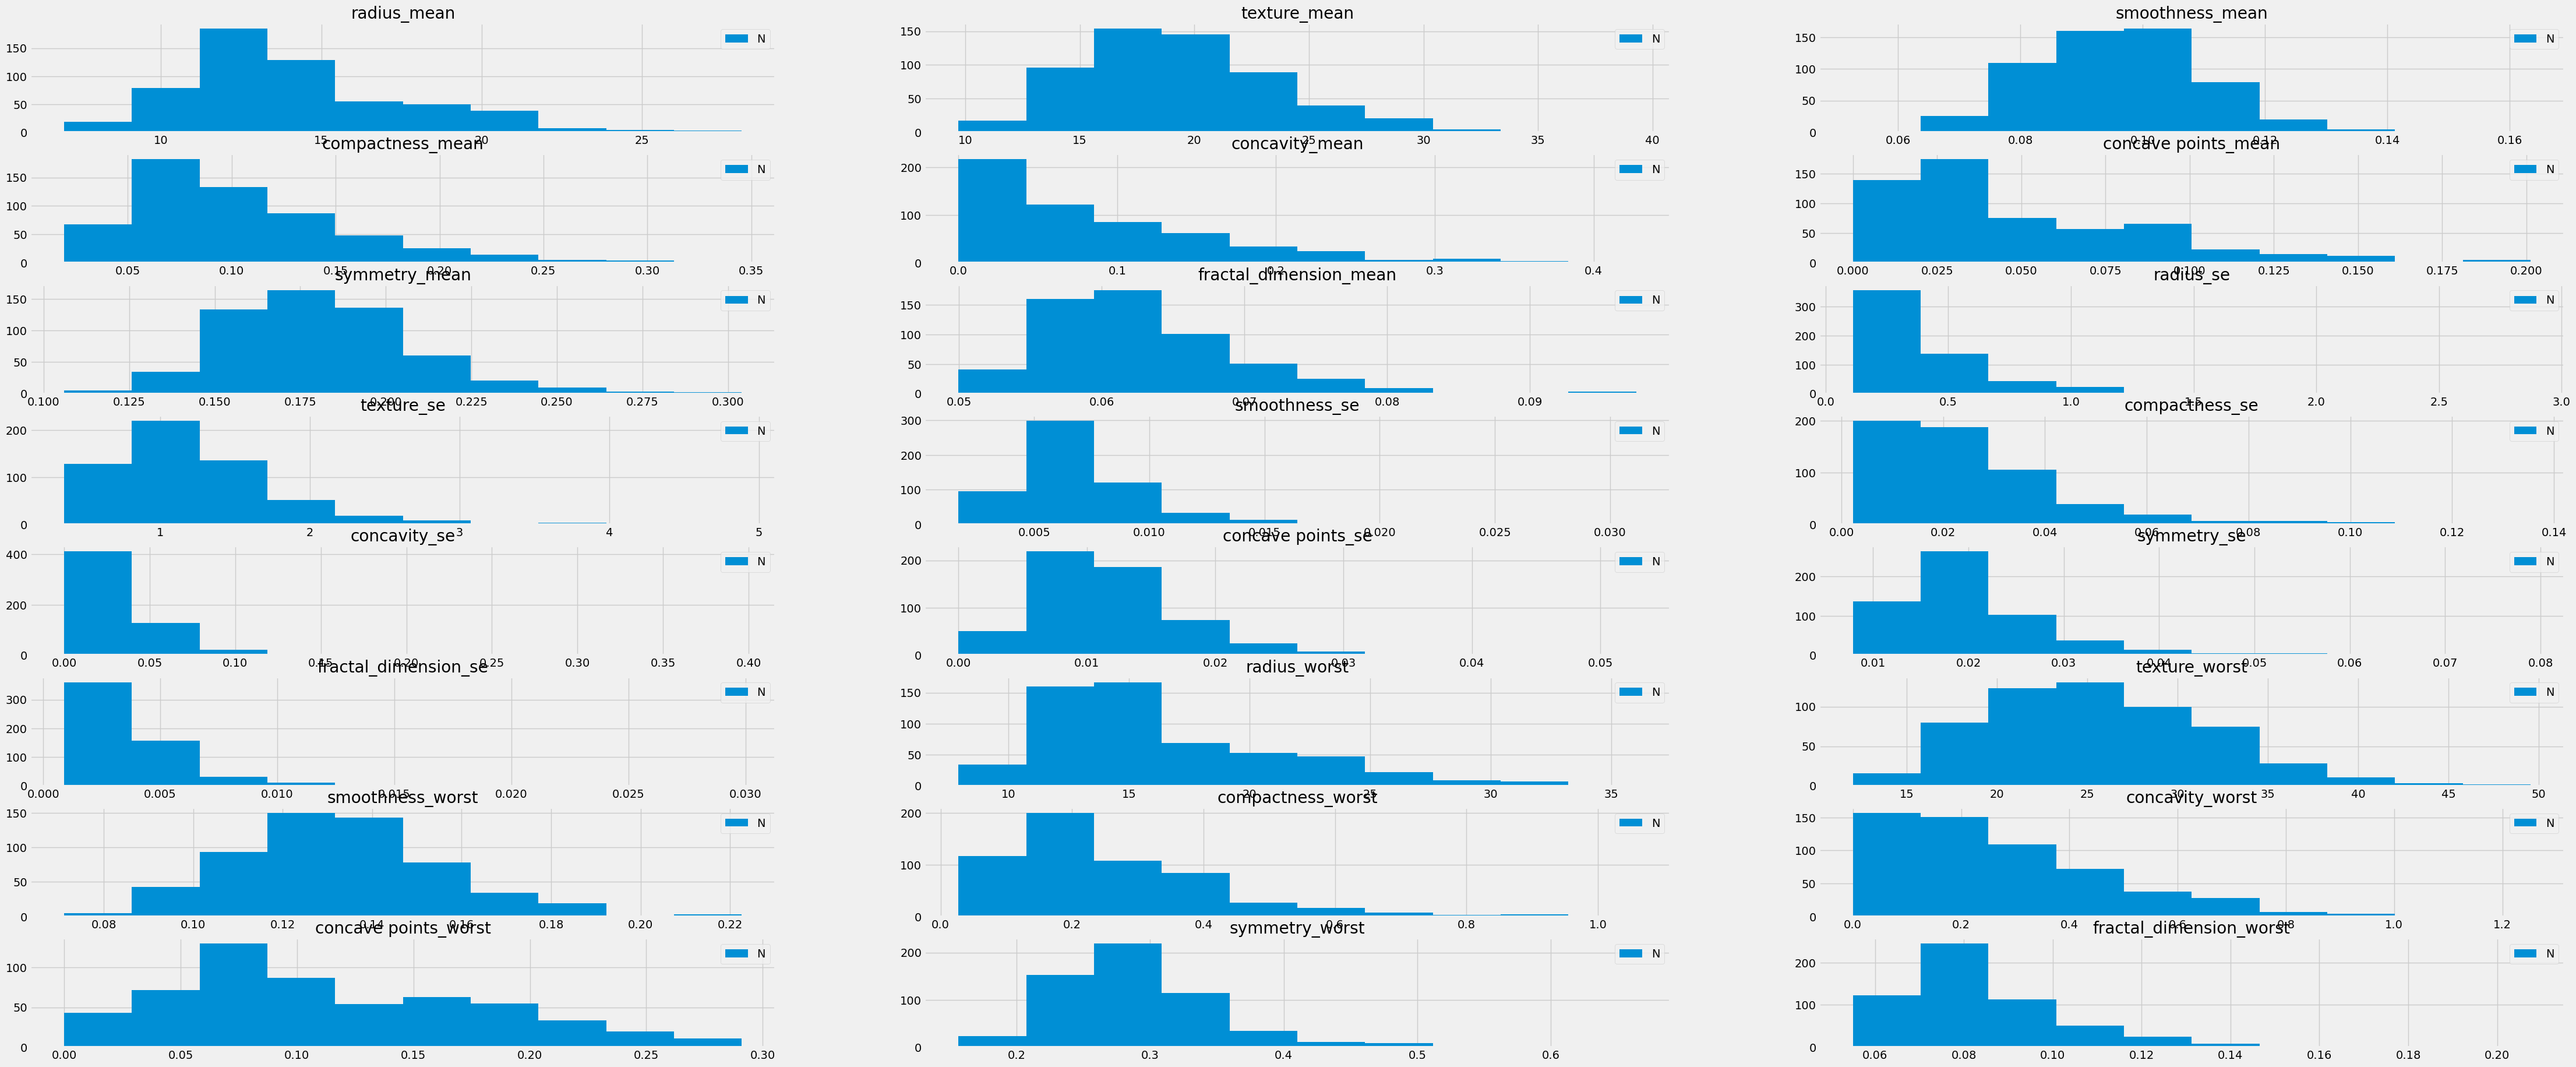

In [54]:
# For the full view
plt.figure(figsize=(50,30))
for i,feature in enumerate(df_resampled):
    plt.subplot(11,3,i+1)
    df[feature].hist()
    plt.legend(f'N = {y.value_counts()}')
    plt.title(feature)
    plt.savefig('figures/histograms resampled/full view.png')

**Comparaison du data brut et celui réduit**

In [55]:
# Ensure the subfolder exists
if not os.path.exists('figures/histograms comparison'):
    os.makedirs('figures/histograms comparison')

for feature in df.columns:
    plt.figure(figsize=(12, 6))
    
    # Plot histogram for original dataset
    plt.hist(df[feature], bins=30, alpha=0.5, label='Original')
    
    # Plot histogram for resampled dataset
    plt.hist(df_resampled[feature], bins=30, alpha=0.5, label='Resampled')
    
    plt.title(f'Comparison of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
    plt.savefig(f'figures/histograms comparison/{feature}_comparison.png')
    plt.close()

### Analyse Bi-varié sur les data réduits

In [56]:
# Ensure the subfolder exists
if not os.path.exists('figures/comparaison cible'):
    os.makedirs('figures/comparaison cible')

# Select features to visualize
more_features_to_plot = df_resampled.columns

# Concatenate df_resampled with y_resampled
df_resampled['diagnosis'] = y_resampled

# Plot histograms for additional features
for feature in more_features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_resampled, x=feature, hue='diagnosis', kde=True, palette='coolwarm', alpha=0.7)
    plt.title(f'Distribution of {feature} by Diagnosis')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.savefig(f'figures/comparaison cible/{feature}_histogram_resampled.png')
    plt.close()

## Feature selection

Il faut standardiser les données

In [57]:
# Scaling the data
df_resampled_scaled = StandardScaler().fit_transform(df_resampled)
df_resampled_scaled = pd.DataFrame(df_resampled_scaled, columns=df_resampled.columns)
df_resampled_scaled.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,-0.496035,-0.935600,-1.439558,-0.310122,0.079715,-0.564122,-1.448490,-0.490416,-0.514422,0.360102,...,-0.073188,-0.641701,-1.074374,-1.616431,-0.291083,0.094933,-0.411607,-1.454885,-0.761955,-1.0
1,-0.758874,-1.185119,1.247223,0.305245,-0.803331,-0.658672,0.557066,2.127332,-0.167662,-1.081286,...,2.091791,-0.786864,-1.589921,0.301879,-0.170935,-1.011635,-1.023805,-0.359605,0.929626,-1.0
2,-0.926135,-1.586726,1.864123,-0.031568,-0.306024,-0.036404,0.638999,0.855579,-0.630449,-0.430387,...,-0.063738,-0.846865,-0.938192,1.128967,-0.223800,-0.410440,0.034787,0.567170,0.330535,-1.0
3,-1.635801,-0.246453,0.681127,-0.989756,-1.243667,-1.392347,1.155527,1.467396,-0.364016,3.081330,...,1.107778,-1.599390,-0.628539,-0.040517,-1.216405,-1.445602,-1.919856,0.264765,-0.244487,-1.0
4,-1.742264,-0.664694,-0.872010,-0.972278,-1.055189,-1.247787,-0.248006,0.290509,-0.960680,-0.487439,...,-0.494314,-1.597067,-0.706358,-0.262853,-0.867795,-1.128650,-1.539606,0.209098,-0.614406,-1.0


#### Using forward selection

Optimal number of features: 6


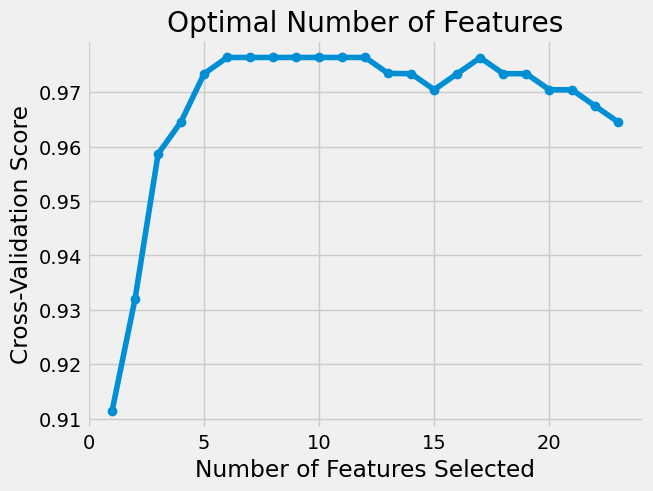

In [ ]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_resampled_scaled.drop('diagnosis', axis= 1), y_resampled, test_size=0.2, random_state=42) # The colomn diagnosis is drop from the X_train and X_test

# Instantiate the logistic regression model
clf = LogisticRegression(solver='liblinear', max_iter=1000)

# Track performance for each number of features
scores = []
feature_counts = list(range(1, X_train.shape[1] ))

# Loop through each possible number of features
for k in feature_counts:
    selector = SequentialFeatureSelector(clf, n_features_to_select=k, direction='forward', cv=5)
    selector.fit(X_train, y_train)
    # Evaluate model performance with cross-validation
    score = cross_val_score(clf, selector.transform(X_train), y_train, cv=5).mean()
    scores.append(score)

# Plot the results
plt.plot(feature_counts, scores, marker='o')
plt.xlabel('Number of Features Selected')
plt.ylabel('Cross-Validation Score')
plt.title('Optimal Number of Features')
plt.savefig('figures/features selection.png')

# Find the optimal number of features
optimal_num_features = feature_counts[scores.index(max(scores))]
print("Optimal number of features:", optimal_num_features)

In [ ]:
# Selecting the optimal features
selector = SequentialFeatureSelector(clf, n_features_to_select=optimal_num_features, direction='forward', cv=5)
selector.fit(X_train, y_train)

# Get the selected feature names
selected_features = X_train.columns[selector.get_support()]

print(f'On a selectionné {optimal_num_features} features')
print("Selected features:", selected_features)

On a selectionné 6 features
Selected features: Index(['concave points_mean', 'symmetry_mean', 'radius_worst', 'texture_worst',
       'smoothness_worst', 'symmetry_worst'],
      dtype='object')


In [67]:
# Save the columns related to the selected_features and the target y in a csv file
df_selected = df_resampled[selected_features]
df_selected['diagnosis'] = y_resampled.values
df_selected.to_csv('forward_selected_features.csv', index=False)


C:\Users\tanjo\AppData\Local\Temp\ipykernel_97268\501591356.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['diagnosis'] = y_resampled.values


### Backward selection

Optimal number of features: 9


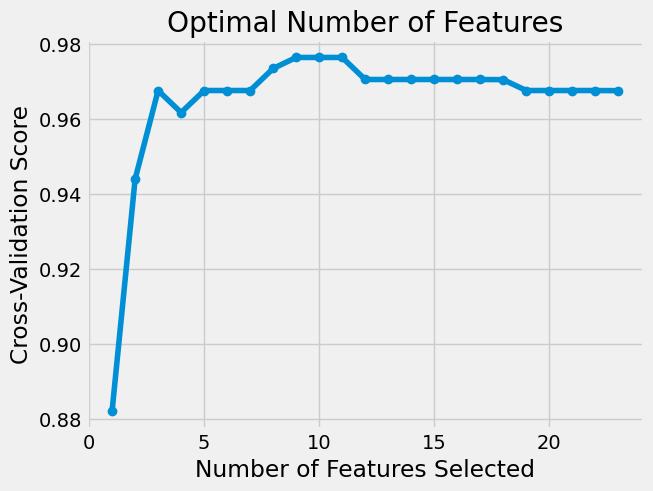

In [68]:
# Instantiate the logistic regression model
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_resampled_scaled.drop('diagnosis', axis= 1), y_resampled, test_size=0.2, random_state=42)

# Instantiate the logistic regression model
clf = LogisticRegression(solver='liblinear', max_iter=1000)

# Track performance for each number of features
scores = []
feature_counts = list(range(1, X_train.shape[1] ))

# Loop through each possible number of features
for k in feature_counts:
    selector = SequentialFeatureSelector(clf, n_features_to_select=k, direction='backward', cv=5)
    selector.fit(X_train, y_train)
    # Evaluate model performance with cross-validation
    score = cross_val_score(clf, selector.transform(X_train), y_train, cv=5).mean()
    scores.append(score)

# Plot the results
plt.plot(feature_counts, scores, marker='o')
plt.xlabel('Number of Features Selected')
plt.ylabel('Cross-Validation Score')
plt.title('Optimal Number of Features')
plt.savefig('figures/backward features selection.png')

# Find the optimal number of features
optimal_num_features = feature_counts[scores.index(max(scores))]
print("Optimal number of features:", optimal_num_features)

In [ ]:
# Saving the selected features
selector = SequentialFeatureSelector(clf, n_features_to_select=optimal_num_features, direction='backward', cv=5)
selector.fit(X_train, y_train)

# Get the selected feature names
selected_features = X_train.columns[selector.get_support()]

print(f'On a selectionné {optimal_num_features} features')
print("Selected features:", selected_features)

On a selectionné 9 features
Selected features: Index(['texture_mean', 'concave points_mean', 'radius_se', 'symmetry_se',
       'radius_worst', 'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


In [70]:
# Save the columns related to the selected_features and the target y in a csv file
df_selected = df_resampled[selected_features]
df_selected['diagnosis'] = y_resampled.values
df_selected.to_csv('backward_selected_features.csv', index=False)

C:\Users\tanjo\AppData\Local\Temp\ipykernel_97268\3239240536.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['diagnosis'] = y_resampled.values


# Model

In [72]:
from perceptron2 import *

In [82]:
print(df_selected.drop('diagnosis', axis = 1).shape)
print(df_selected['diagnosis'].shape)

(424, 9)
(424,)


In [80]:
W, b = artificial_neuron(df_selected.drop('diagnosis', axis = 1), df_selected['diagnosis'], 0.01, 100)

c:\Users\tanjo\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\tanjo\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\tanjo\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **pass

ValueError: operands could not be broadcast together with shapes (9,424) (9,521) 